In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; } </style>"))
from random import randint

In [3]:
class mynode:
    def __init__(self,parent,ID,value=None):
        self.ID=ID
        self.parent=parent
        self.value=value
        self.children=[]

    def append(self,ID,value=None):
        child=mynode(parent=self,ID=ID,value=value)
        self.children.append(child)
        return child
        
    def create_subgraph(self,graph,labels):
        if self.value is not None:
            labels[self.ID]=str(self.value)
        for child in self.children:
            graph.add_node(child.ID)
            graph.add_edge(self.ID,child.ID)
            if child.value is not None:
                labels[child.ID]=str(child.value)
            else:
                labels[child.ID]=''
            child.create_subgraph(graph,labels)
        

class mygraph:
    def __init__(self,centralnode=None):
        self.centralnode=centralnode
        self.labels={}
        
    def create_graph(self,graph):
        self.graph=graph
        self.centralnode.create_subgraph(self.graph,self.labels)
        #nx.draw(self.graph)

In [4]:
centralnode=mynode(None,1)
for i in range(3):
    next0=centralnode.append(10+i)
    for j in range(3):
        next1=next0.append(100+i*10+j)
        for k in range(3):
            next2=next1.append(next1.ID*10+k)
            for l in range(3):
                next3=next2.append(next2.ID*10+l,value=randint(0,99))
#                for m in range(3):
#                    next4=next3.append(next3.ID*10+m,value=randint(0,99))

In [5]:
def minimax(node,depth,minormax):
    if depth==0:
        H.labels[node.ID]=(node.value,1)
        return node.value,node,
    else:
        values=[]
        ndepth=depth-1
        bestval=-1*minormax*1e18
        bestnode=None
        for child in node.children:
            nextval,_=minimax(child,ndepth,-1*minormax)
            if minormax>0:
                if nextval>bestval:
                    bestval=nextval
                    bestnode=child
            else:
                if nextval<bestval:
                    bestval=nextval
                    bestnode=child
        node.value=bestval
        H.labels[node.ID]=(node.value,minormax*100,100)
        return bestval,bestnode


In [68]:
def alphabeta(node,depth,minormax,alpha,beta):
    if depth==0:
        H.labels[node.ID]=(node.value)
        text[node.ID].set_text(str((node.value)))
        return node,node.value,
    else:
        values=[]
        ndepth=depth-1
        bestnode=None
        v=-1e36*minormax
        for child in node.children:
            if alpha>=beta:
                #print("break",depth,alpha,beta)
                break
            #print(depth,alpha,beta)
            _,new_v=alphabeta(child,ndepth,-1*minormax,alpha,beta)
            if minormax>0:
                if new_v>v:
                    v=new_v
                    bestnode=child
                    alpha=max(alpha,v)
            else:
                if new_v<v:
                    v=new_v
                    bestnode=child
                    beta=min(beta,v)
        node.value=v
        H.labels[node.ID]=(node.value,alpha,beta)
        text[node.ID].set_text(str((node.ID,node.value,alpha,beta)))
        return bestnode,v,



In [44]:
G=nx.DiGraph()
H=mygraph(centralnode)
H.create_graph(G)
mm=1


        


In [73]:
H.labels={}
minimax(centralnode,4,1)

(19, <__main__.mynode at 0x7f81abbb8dd8>)

In [74]:
H.labels={}
for _,t in text.items():
    t.set_rotation('vertical')
    t.set_text('')
#print(H.labels)
alphabeta(centralnode,4,1,-1e6,1e6)
#print(H.labels)

call 1 -1000000.0 1000000.0
call 10 -1000000.0 1000000.0
call 100 -1000000.0 1000000.0
call 1000 -1000000.0 1000000.0
call 10000 -1000000.0 1000000.0
new: 10000 -1000000.0 1000000.0
new: 10000 -1000000.0 5
call 10001 -1000000.0 5
new: 10001 -1000000.0 5
call 10002 -1000000.0 5
new: 10002 -1000000.0 5
new: 1000 5 1000000.0
call 1001 5 1000000.0
call 10010 5 1000000.0
new: 10010 5 1000000.0
new: 10010 5 52
call 10011 5 52
new: 10011 5 52
call 10012 5 52
new: 10012 5 52
new: 10012 5 35
new: 1001 35 1000000.0
call 1002 35 1000000.0
call 10020 35 1000000.0
new: 10020 35 1000000.0
new: 10020 35 70
call 10021 35 70
new: 10021 35 70
call 10022 35 70
new: 10022 35 70
new: 10022 35 12
new: 100 -1000000.0 35
call 101 -1000000.0 35
call 1010 -1000000.0 35
call 10100 -1000000.0 35
new: 10100 -1000000.0 35
new: 10100 -1000000.0 35
call 10101 -1000000.0 35
new: 10101 -1000000.0 35
call 10102 -1000000.0 35
new: 10102 -1000000.0 35
new: 10102 -1000000.0 12
new: 1010 12 35
call 1011 12 35
call 10110 12 

(<__main__.mynode at 0x7f81abbb8dd8>, 19)

<IPython.core.display.Javascript object>


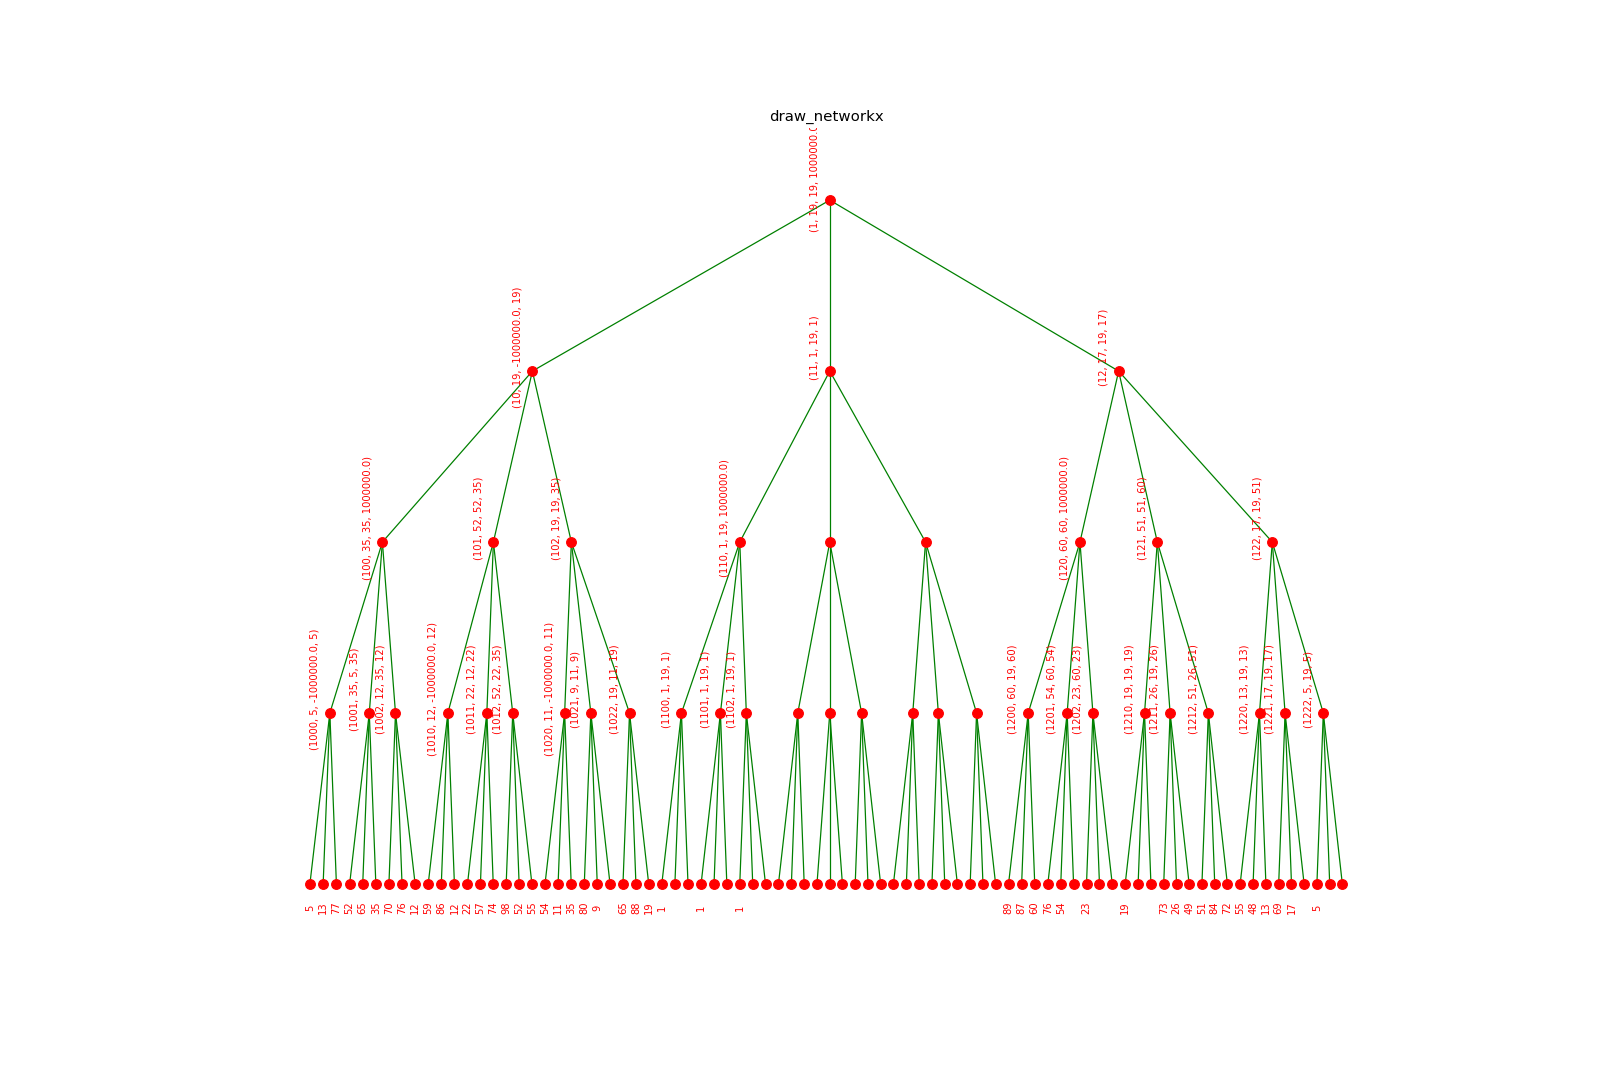

In [72]:
%matplotlib notebook
plt.figure(3,figsize=(18,12)) 


plt.title('draw_networkx')
pos =graphviz_layout(G, prog='dot')
labels={}
post=pos.copy()
for node in G.nodes:
    if node >= 10000:
        post[node]=(post[node][0],post[node][1]-10)
    else:
        post[node]=(post[node][0]-100,post[node][1]+10)
#write_dot(G,'test.dot')
#G.draw()
nx.draw(G, pos, with_labels=False, arrows=False,node_size=60,font_size=8,edge_color='g')
text=nx.draw_networkx_labels(G,post,H.labels,font_size=8,font_color='r')
for _,t in text.items():
    t.set_rotation('vertical')

In [51]:
centralnode.children[0].children[2].children[2].children[2].value=19

<IPython.core.display.Javascript object>


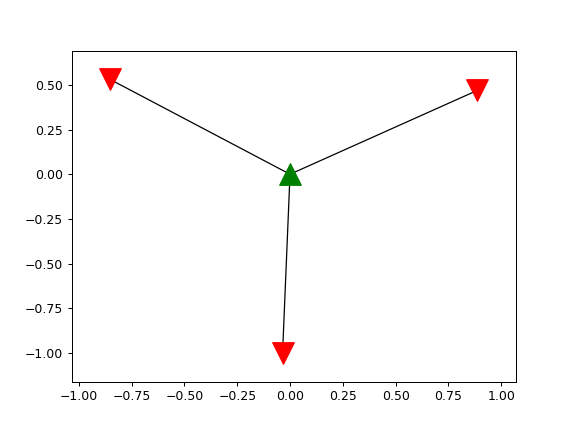

In [30]:
%matplotlib notebook
b=3
G = nx.Graph()
G.add_node(1)
for i in range(b):
    G.add_node(10+i) # You can also add a list of nodes by passing a list argument
    G.add_edge(1,10+i)

# Add edges 

#e = (2,3)
#G.add_edge(*e) # * unpacks the tuple
#G.add_edges_from([(1,11), (1,12),(1,13)]) # Just like nodes we can add edges from a list
pos=nx.spring_layout(G)
#pos=nx.circular_layout(G)
nx.draw_networkx_nodes(G,pos,nodelist=[1],node_shape='^',node_color='g')
nx.draw_networkx_nodes(G,pos,nodelist=[10,11,12],node_shape='v')
nx.draw_networkx_edges(G,pos)

In [19]:
H=G.subgraph((1,2))

<IPython.core.display.Javascript object>


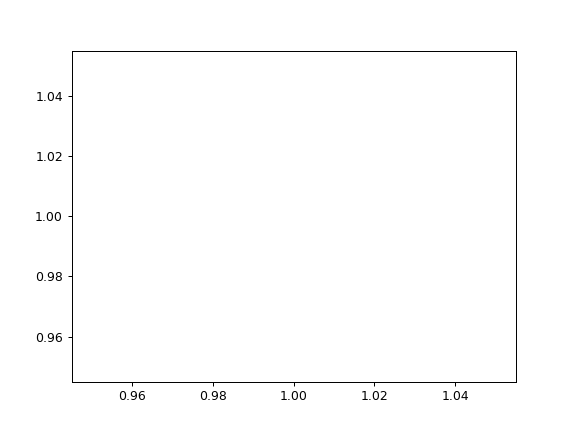

In [48]:
%matplotlib notebook
plt.plot(1,1)

In [12]:
text

{1: Text(3348.4,316,'(44, 44, 1000000.0)'),
 10: Text(1395.4,244,'(17, -1000000.0, 17)'),
 11: Text(3348.4,244,'(44, 17, 44)'),
 12: Text(5245.4,244,'(44, 44, 44)'),
 100: Text(410.45,172,'(35, 35, 1000000.0)'),
 101: Text(1139.4,172,'(35, 35, 35)'),
 102: Text(1651.4,172,'(17, 17, 35)'),
 110: Text(2757.4,172,'(63, 63, 1000000.0)'),
 111: Text(3348.4,172,'(51, 51, 63)'),
 112: Text(3977.4,172,'(44, 44, 51)'),
 120: Text(4991.4,172,'(60, 60, 1000000.0)'),
 121: Text(5499.4,172,'(51, 51, 60)'),
 122: Text(6254.4,172,'(44, 44, 51)'),
 1000: Text(65.45,100,'(5, -1000000.0, 5)'),
 1001: Text(324.45,100,'(35, 5, 35)'),
 1002: Text(496.45,100,'(12, 35, 12)'),
 1010: Text(840.45,100,'(12, -1000000.0, 12)'),
 1011: Text(1096.4,100,'(22, 12, 22)'),
 1012: Text(1266.4,100,'(35, 22, 35)'),
 1020: Text(1607.4,100,'(11, -1000000.0, 11)'),
 1021: Text(1779.4,100,'(9, 11, 9)'),
 1022: Text(2033.4,100,'(17, 11, 17)'),
 1100: Text(2374.4,100,'(29, 17, 29)'),
 1101: Text(2630.4,100,'(63, 29, 63)'),
 110